In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np
from getpass import getpass
import psycopg2
import pandas.io.sql as sqlio

In [4]:
accidents_by_vehicle2020  = pd.read_csv('/Users/anastasiasadova/Desktop/files_git/2020_accidents_vehicles_edited.csv')

In [5]:
accidents_by_vehicle2020

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Day_Type,Year,Month_Number,Month_Name,Day_of_Month,...,Vehicle_Brand,Vehicle_Color,License_Description,License_Age,Coordenada_UTM_X,Coordenada_UTM_Y,Latitud,Longitud,Date,Valid_License_Age
0,2020S000001,Horta-Guinardó,la Font d'en Fargues,Maragall,Wednesday,Working Day,2020,1,January,1,...,CITROEN,Unknown,B,4,430501.45,4586751.53,41.427474,2.167116,2020-01-01,4.0
1,2020S000002,Sants-Montjuïc,la Bordeta,Corts Catalanes,Wednesday,Working Day,2020,1,January,1,...,MERCEDES-BENZ,Black/Yellow,B,11,428225.71,4580279.72,41.368985,2.140650,2020-01-01,11.0
2,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarrià,Wednesday,Working Day,2020,1,January,1,...,YAMAHA,Black,A,24,428532.59,4582672.59,41.390564,2.144037,2020-01-01,24.0
3,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarrià,Wednesday,Working Day,2020,1,January,1,...,DACIA,Black/Yellow,B,9,428532.59,4582672.59,41.390564,2.144037,2020-01-01,9.0
4,2020S000004,Les Corts,les Corts,Doctor Fleming,Wednesday,Working Day,2020,1,January,1,...,SEAT,Gray,B,4,427929.13,4582767.09,41.391361,2.136808,2020-01-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11693,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Thursday,Working Day,2020,12,December,31,...,KYMCO,Unknown,B,16,431410.40,4581077.37,41.376447,2.178636,2020-12-31,16.0
11694,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Thursday,Working Day,2020,12,December,31,...,Unknown,Black,Unknown,Unknown,431410.40,4581077.37,41.376447,2.178636,2020-12-31,NaN
11695,2020S006277,Eixample,la Nova Esquerra de l'Eixample,Aragó,Thursday,Working Day,2020,12,December,31,...,HONDA,Red,A,25,429362.84,4581954.15,41.384166,2.154051,2020-12-31,25.0
11696,2020S006278,Nou Barris,Vilapicina i la Torre Llobeta,Quinze,Tuesday,Working Day,2020,12,December,22,...,RENAULT,White,Unknown,Unknown,431221.22,4586654.09,41.426658,2.175740,2020-12-22,NaN


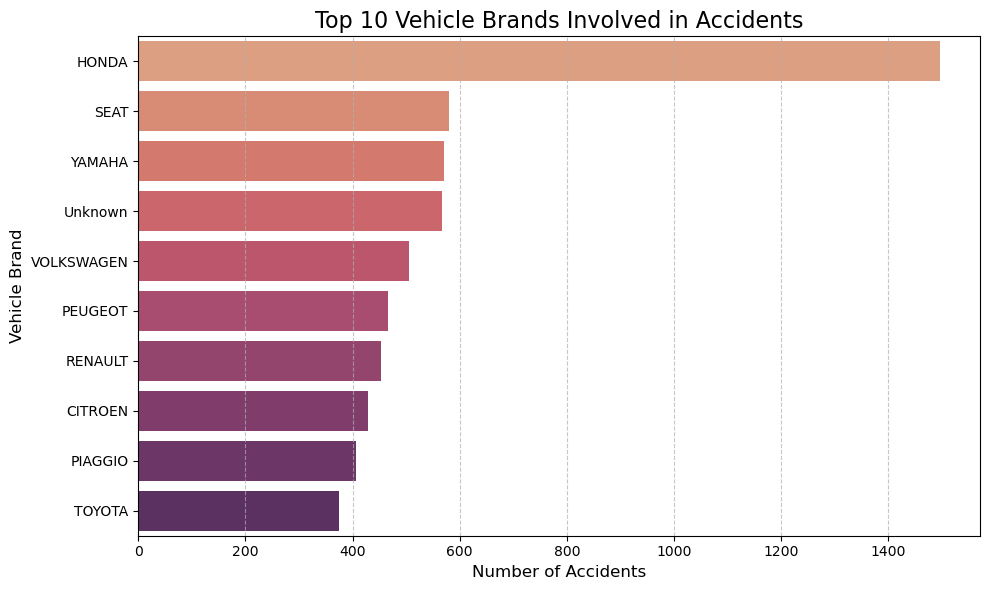

In [8]:
# Count occurrences of each vehicle brand
top_vehicle_brands = accidents_by_vehicle2020['Vehicle_Brand'].value_counts().head(10)

# Plot the top 10 vehicle brands
plt.figure(figsize=(10, 6))
sns.barplot(x=top_vehicle_brands.values, y=top_vehicle_brands.index, palette="flare")
plt.title('Top 10 Vehicle Brands Involved in Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Vehicle Brand', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



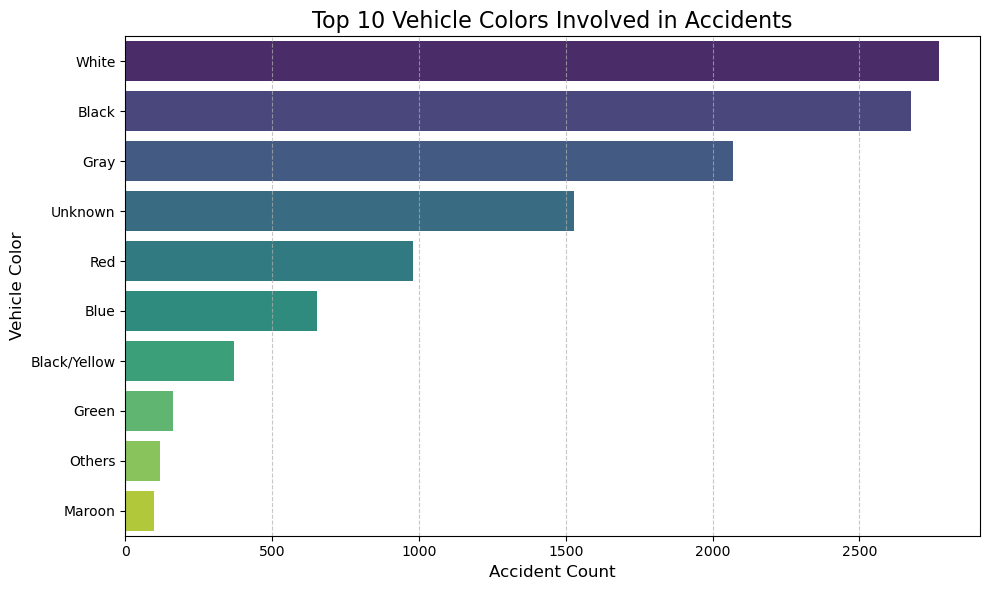

In [10]:
# Count occurrences of each vehicle color
top_vehicle_colors = accidents_by_vehicle2020['Vehicle_Color'].value_counts().head(10)

# Plot the top vehicle colors
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_vehicle_colors.values, 
    y=top_vehicle_colors.index, 
    palette='viridis'
)

# Customize the plot
plt.title('Top 10 Vehicle Colors Involved in Accidents', fontsize=16)
plt.xlabel('Accident Count', fontsize=12)
plt.ylabel('Vehicle Color', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


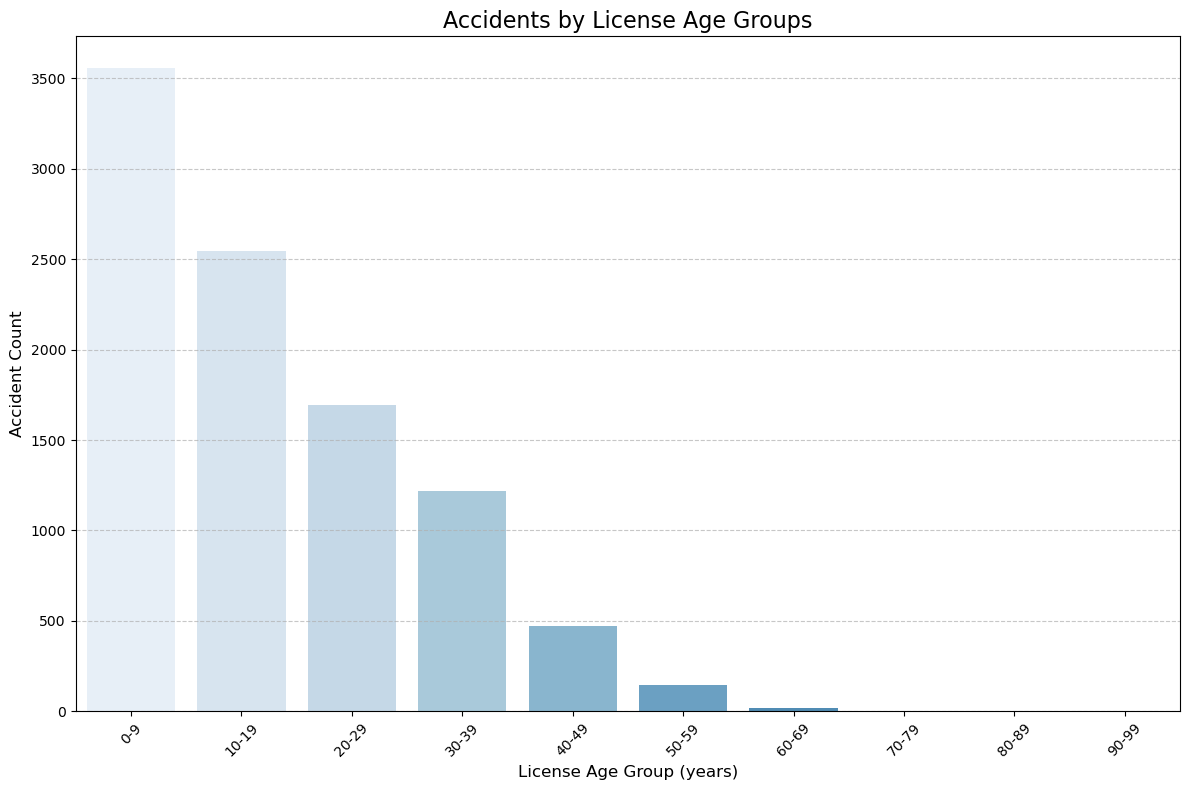

In [17]:
# Drop invalid or unknown license ages if necessary
valid_license_age = accidents_by_vehicle2020['Valid_License_Age'].dropna()

# Create bins for age ranges
bins = list(range(0, 101, 10))  # 0-10, 11-20, ..., 91-100
labels = [f"{b}-{b+9}" for b in bins[:-1]]  # Label bins as "0-9", "10-19", etc.
accidents_by_vehicle2020['License_Age_Binned'] = pd.cut(accidents_by_vehicle2020['Valid_License_Age'], bins=bins, labels=labels)

# Count occurrences for each bin
license_age_counts = accidents_by_vehicle2020['License_Age_Binned'].value_counts().sort_index()

# Plot histogram with bins
plt.figure(figsize=(12, 8))
sns.barplot(x=license_age_counts.index, y=license_age_counts.values, palette="Blues")

# Customize the plot
plt.title('Accidents by License Age Groups', fontsize=16)
plt.xlabel('License Age Group (years)', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Group data by Vehicle_Brand and Vehicle_Color, then count occurrences
vehicle_counts = accidents_by_vehicle2020.groupby(['Vehicle_Brand', 'Vehicle_Color']).size().reset_index(name='Count')

# Sort by 'Count' in ascending order to get the least common combinations
least_common_vehicles = vehicle_counts.sort_values(by='Count').head(5)
least_common_vehicles

,Vehicle_Brand,Vehicle_Color,Count
417,LECAPITAINE INDUSTRIE,Unknown,1
425,LIEBHERR,Unknown,1
422,LEXUS,Red,1
415,LECAPITAINE,Unknown,1
412,LAND ROVER,Red,1


    Vehicle_Brand Vehicle_Color  Count
285         HONDA         Black    561
781       Unknown       Unknown    288
290         HONDA          Gray    275
298         HONDA         White    275
822        YAMAHA         Black    210
599       RENAULT         White    185
563       PEUGEOT         White    167
826        YAMAHA          Gray    162
816        XIAOMI         Black    158
297         HONDA       Unknown    144


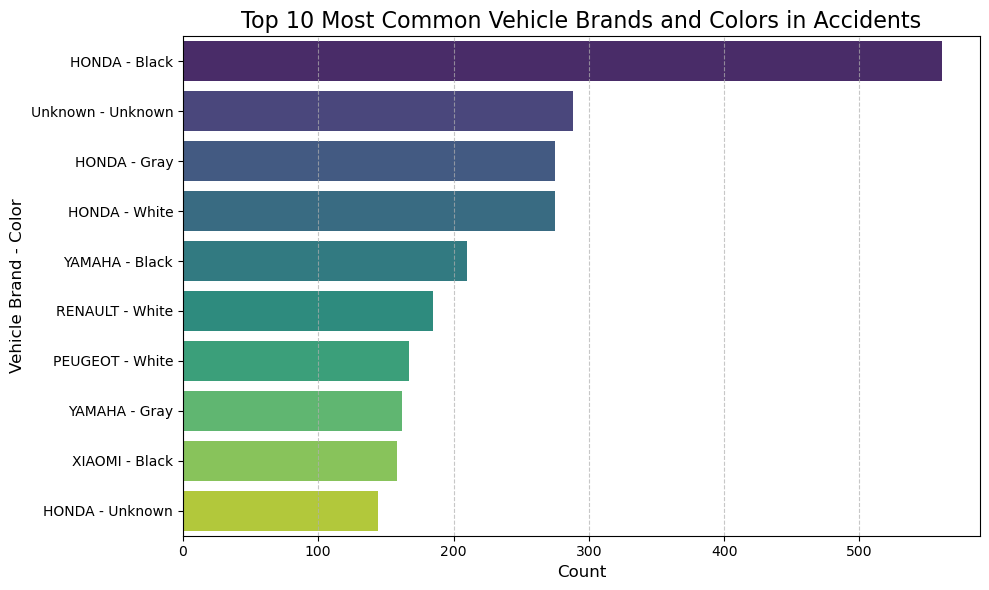

In [21]:
# Group data by Vehicle_Brand and Vehicle_Color, then count occurrences
vehicle_counts = accidents_by_vehicle2020.groupby(['Vehicle_Brand', 'Vehicle_Color']).size().reset_index(name='Count')

# Sort by 'Count' in descending order to get the most common combinations
most_common_vehicles = vehicle_counts.sort_values(by='Count', ascending=False).head(10)

# Display the top 10 most common vehicle-brand-color combinations
print(most_common_vehicles)

# Plot the most common combinations
plt.figure(figsize=(10, 6))
sns.barplot(
    data=most_common_vehicles, 
    x='Count', 
    y=most_common_vehicles['Vehicle_Brand'] + " - " + most_common_vehicles['Vehicle_Color'],
    palette='viridis'
)

# Customize the plot
plt.title('Top 10 Most Common Vehicle Brands and Colors in Accidents', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Vehicle Brand - Color', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
most_common = accidents_by_vehicle2020['License_Description'].value_counts().idxmax()
most_common_count = accidents_by_vehicle2020['License_Description'].value_counts().max()

print(f"The most common License_Description is '{most_common}' with {most_common_count} occurrences.")

The most common License_Description is 'B' with 7306 occurrences.


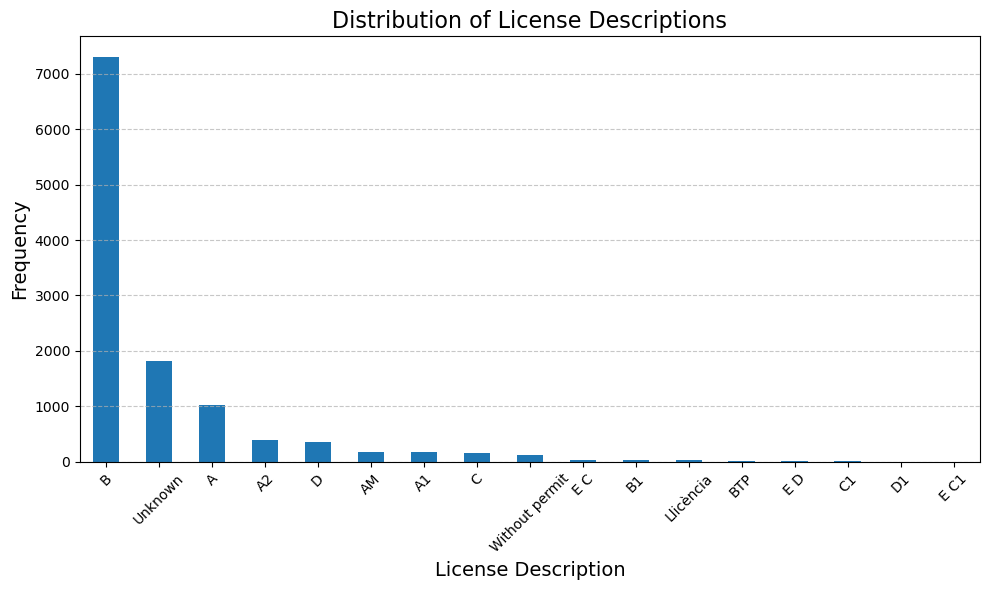

In [24]:
# Plot the distribution of License_Description
license_counts = accidents_by_vehicle2020['License_Description'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
license_counts.plot(kind='bar')
plt.title('Distribution of License Descriptions', fontsize=16)
plt.xlabel('License Description', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


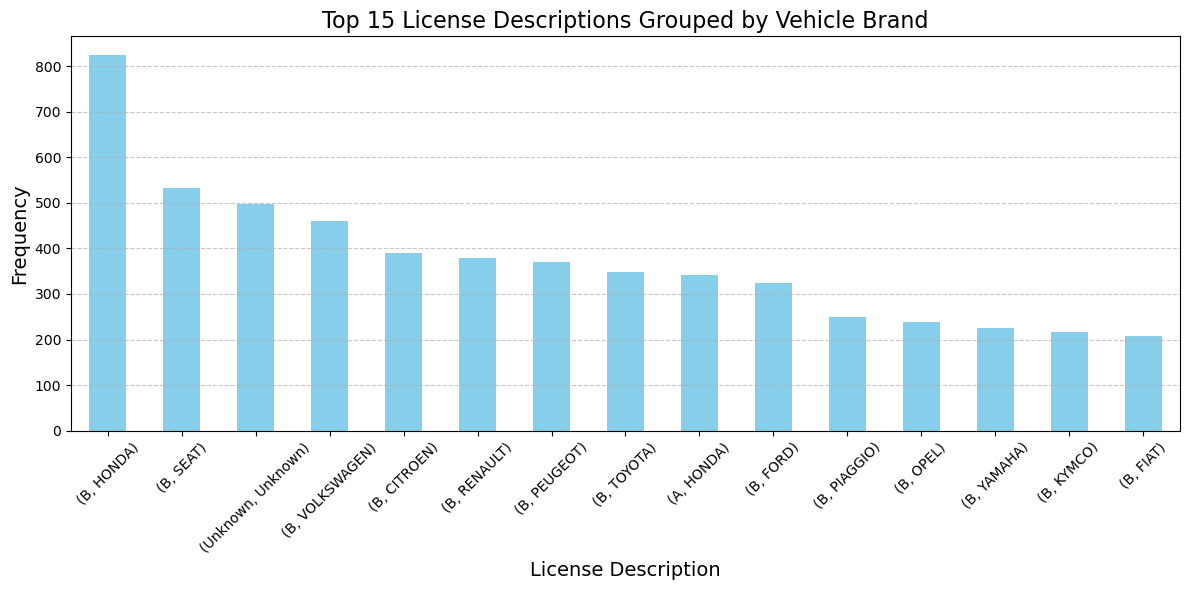

In [27]:
# Get the top 15 License_Descriptions by total frequency
top_15 = grouped_data.sum(axis=1).nlargest(15)

# Plot the top 15 License Descriptions
plt.figure(figsize=(12, 6))
top_15.plot(kind='bar', color='skyblue')
plt.title('Top 15 License Descriptions Grouped by Vehicle Brand', fontsize=16)
plt.xlabel('License Description', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
